In [1]:
import pandas as pd
import yfinance as yf
from yahoo_fin.stock_info import get_data
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

# requires python 3.9 min

In [2]:
# define investment amount
investment_amount = 100000

In [3]:
# pull historical data for 10 tickers 
ticker_list = ["amzn", "aapl", "msft", "googl", "meta", "nvda", "amd", "intc", "csco", "qcom"]

# fetch historical data for each ticker
ticker_data = yf.download(ticker_list, start="2020-04-30", end="2023-04-30")
prices_df = ticker_data

# display the resulting DataFrame
prices_df

[*********************100%***********************]  10 of 10 completed


Adj Close                                                \
                  AAPL        AMD        AMZN       CSCO       GOOGL   
Date                                                                   
2020-04-30   72.018127  52.389999  123.699997  38.644314   67.334999   
2020-05-01   70.858696  49.880001  114.302002  37.313007   65.865997   
2020-05-04   71.861267  52.560001  115.799500  37.705101   66.144997   
2020-05-05   72.939804  52.189999  115.889999  37.805405   67.450996   
2020-05-06   73.692337  52.160000  117.563004  37.522728   67.271500   
...                ...        ...         ...        ...         ...   
2023-04-24  165.330002  87.570000  106.209999  47.389999  105.970001   
2023-04-25  163.770004  83.800003  102.570000  47.090000  103.849998   
2023-04-26  163.759995  85.940002  104.980003  46.540001  103.709999   
2023-04-27  168.410004  87.440002  109.820000  46.560001  107.589996   
2023-04-28  169.679993  89.370003  105.449997  47.250000  107.339996   

                                                                       ...  \
                 INTC        META        MSFT        NVDA        QCOM  ...   
Date                                                                   ...   
2020-04-30  54.252151  204.710007  174.264206   72.849052   73.861023  ...   
2020-05-01  51.981842  202.270004  169.752258   70.481239   71.016243  ...   
2020-05-04  52.452190  205.259995  173.904419   72.602295   71.053802  ...   
2020-05-05  53.139606  207.070007  175.771439   73.212952   72.884598  ...   
2020-05-06  53.830914  208.470001  177.502304   74.222389   74.048790  ...   
...               ...         ...         ...         ...         ...  ...   
2023-04-24  29.539036  212.789993  281.769989  270.420013  117.349998  ...   
2023-04-25  28.762217  207.550003  275.420013  262.410004  114.050003  ...   
2023-04-26  28.931524  209.399994  295.369995  269.559998  114.160004  ...   
2023-04-27  29.738222  238.559998  304.829987  272.260010  113.919998  ...   
2023-04-28  30.933327  240.320007  307.260010  277.489990  116.800003  ...   

               Volume                                                     \
                 AAPL       AMD       AMZN      CSCO     GOOGL      INTC   
Date                                                                       
2020-04-30  183064000  65543900  190692000  26679900  55842000  26279900   
2020-05-01  240616800  69562700  195452000  22095300  48872000  21194800   
2020-05-04  133568000  62590600   97318000  15997700  30806000  18957200   
2020-05-05  147751200  56560500   64850000  15060200  39666000  17252100   
2020-05-06  142333600  48138100   62356000  16040300  31732000  17848700   
...               ...       ...        ...       ...       ...       ...   
2023-04-24   41949600  40423800   69575600  17359900  23542800  38732500   
2023-04-25   48714100  52771500   65026800  20281600  46664100  38289900   
2023-04-26   45498800  47786600   73803800  22390500  53347600  41218800   
2023-04-27   64902300  53087200  149961200  22845400  50089200  60186200   
2023-04-28   55209200  50652100  130565000  19662000  36139800  80229700   

                                                    
                META      MSFT      NVDA      QCOM  
Date                                                
2020-04-30  46230100  53875900  37591600  17113500  
2020-05-01  30415600  39370500  34209600   9742100  
2020-05-04  19250700  30372900  31755600   7202400  
2020-05-05  21071200  36839200  36889600   7540800  
2020-05-06  21857000  32139300  32346400   8179700  
...              ...       ...       ...       ...  
2023-04-24  15750900  26611000  33928200   4097900  
2023-04-25  19198200  45772200  37852700   7045200  
2023-04-26  41992700  64599200  40633700   4671100  
2023-04-27  71196500  46462600  37716100   6945700  
2023-04-28  39554000  36446700  29168700   8651300  

[755 rows x 60 columns]

In [4]:
# calculate daily returns for ticker data in prices DataFrame 
daily_returns = prices_df["Close"].pct_change()

# format DataFrame to make usable with MCForecastTools
daily_returns.columns = pd.MultiIndex.from_product([daily_returns.columns, ["daily_return"]])
daily_returns=daily_returns.swaplevel(axis=1).dropna()

# display resulting DataFrame
daily_returns

daily_return                                                    \
                   AAPL       AMD      AMZN      CSCO     GOOGL      INTC   
Date                                                                        
2020-05-01    -0.016099 -0.047910 -0.075974 -0.034450 -0.021816 -0.041847   
2020-05-04     0.014149  0.053729  0.013101  0.010508  0.004236  0.009048   
2020-05-05     0.015009 -0.007040  0.000782  0.002660  0.019744  0.013106   
2020-05-06     0.010317 -0.000575  0.014436 -0.007477 -0.002661  0.007319   
2020-05-07     0.010345 -0.004026  0.006954  0.005346  0.017727 -0.000169   
...                 ...       ...       ...       ...       ...       ...   
2023-04-24     0.001879 -0.009725 -0.007012  0.007655  0.005313 -0.021122   
2023-04-25    -0.009436 -0.043051 -0.034272 -0.006330 -0.020006 -0.026298   
2023-04-26    -0.000061  0.025537  0.023496 -0.011680 -0.001348  0.005886   
2023-04-27     0.028395  0.017454  0.046104  0.000430  0.037412  0.027883   
2023-04-28     0.007541  0.022072 -0.039792  0.014820 -0.002324  0.040188   

                                                    
                META      MSFT      NVDA      QCOM  
Date                                                
2020-05-01 -0.011919 -0.025891 -0.032503 -0.038515  
2020-05-04  0.014782  0.024460  0.030094  0.000529  
2020-05-05  0.008818  0.010736  0.008411  0.025766  
2020-05-06  0.006761  0.009847  0.013788  0.015973  
2020-05-07  0.013383  0.005807  0.023775 -0.000507  
...              ...       ...       ...       ...  
2023-04-24 -0.000470 -0.013963 -0.002839 -0.003482  
2023-04-25 -0.024625 -0.022536 -0.029621 -0.028121  
2023-04-26  0.008913  0.072435  0.027247  0.000964  
2023-04-27  0.139255  0.032028  0.010016 -0.002102  
2023-04-28  0.007378  0.007972  0.019210  0.025281  

[754 rows x 10 columns]

In [17]:
# concatenate ticker DataFrame with Daily Returns DataFrame
prices_df = pd.concat([prices_df, daily_returns], axis=1, join="inner")

In [7]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
#The weights should be split evenly across 10 tech stocks
# Run 500 samples.
MC_10_yrs = MCSimulation(
    portfolio_data=prices_df,
    weights=[.10,.10,.10,.10,.10,.10,.10,.10,.10,.10],
    num_simulation=500,
    num_trading_days=252*10
)

# Review the simulation input data
display(MC_10_yrs.portfolio_data.head())
display(MC_10_yrs.portfolio_data.tail())



Adj Close                                                          \
                 AAPL        AMD        AMZN       CSCO      GOOGL       INTC   
Date                                                                            
2020-05-01  70.858696  49.880001  114.302002  37.313007  65.865997  51.981842   
2020-05-04  71.861267  52.560001  115.799500  37.705101  66.144997  52.452190   
2020-05-05  72.939804  52.189999  115.889999  37.805405  67.450996  53.139606   
2020-05-06  73.692337  52.160000  117.563004  37.522728  67.271500  53.830914   
2020-05-07  74.454689  51.950001  118.380501  37.723331  68.463997  53.821815   

                                                          ... daily_return  \
                  META        MSFT       NVDA       QCOM  ...         AAPL   
Date                                                      ...                
2020-05-01  202.270004  169.752258  70.481239  71.016243  ...    -0.016099   
2020-05-04  205.259995  173.904419  72.602295  71.053802  ...     0.014149   
2020-05-05  207.070007  175.771439  73.212952  72.884598  ...     0.015009   
2020-05-06  208.470001  177.502304  74.222389  74.048790  ...     0.010317   
2020-05-07  211.259995  178.533051  75.987038  74.011253  ...     0.010345   

                                                                        \
                 AMD      AMZN      CSCO     GOOGL      INTC      META   
Date                                                                     
2020-05-01 -0.047910 -0.075974 -0.034450 -0.021816 -0.041847 -0.011919   
2020-05-04  0.053729  0.013101  0.010508  0.004236  0.009048  0.014782   
2020-05-05 -0.007040  0.000782  0.002660  0.019744  0.013106  0.008818   
2020-05-06 -0.000575  0.014436 -0.007477 -0.002661  0.007319  0.006761   
2020-05-07 -0.004026  0.006954  0.005346  0.017727 -0.000169  0.013383   

                                          
                MSFT      NVDA      QCOM  
Date                                      
2020-05-01 -0.025891 -0.032503 -0.038515  
2020-05-04  0.024460  0.030094  0.000529  
2020-05-05  0.010736  0.008411  0.025766  
2020-05-06  0.009847  0.013788  0.015973  
2020-05-07  0.005807  0.023775 -0.000507  

[5 rows x 70 columns]

Adj Close                                                \
                  AAPL        AMD        AMZN       CSCO       GOOGL   
Date                                                                   
2023-04-24  165.330002  87.570000  106.209999  47.389999  105.970001   
2023-04-25  163.770004  83.800003  102.570000  47.090000  103.849998   
2023-04-26  163.759995  85.940002  104.980003  46.540001  103.709999   
2023-04-27  168.410004  87.440002  109.820000  46.560001  107.589996   
2023-04-28  169.679993  89.370003  105.449997  47.250000  107.339996   

                                                                       ...  \
                 INTC        META        MSFT        NVDA        QCOM  ...   
Date                                                                   ...   
2023-04-24  29.539036  212.789993  281.769989  270.420013  117.349998  ...   
2023-04-25  28.762217  207.550003  275.420013  262.410004  114.050003  ...   
2023-04-26  28.931524  209.399994  295.369995  269.559998  114.160004  ...   
2023-04-27  29.738222  238.559998  304.829987  272.260010  113.919998  ...   
2023-04-28  30.933327  240.320007  307.260010  277.489990  116.800003  ...   

           daily_return                                                    \
                   AAPL       AMD      AMZN      CSCO     GOOGL      INTC   
Date                                                                        
2023-04-24     0.001879 -0.009725 -0.007012  0.007655  0.005313 -0.021122   
2023-04-25    -0.009436 -0.043051 -0.034272 -0.006330 -0.020006 -0.026298   
2023-04-26    -0.000061  0.025537  0.023496 -0.011680 -0.001348  0.005886   
2023-04-27     0.028395  0.017454  0.046104  0.000430  0.037412  0.027883   
2023-04-28     0.007541  0.022072 -0.039792  0.014820 -0.002324  0.040188   

                                                    
                META      MSFT      NVDA      QCOM  
Date                                                
2023-04-24 -0.000470 -0.013963 -0.002839 -0.003482  
2023-04-25 -0.024625 -0.022536 -0.029621 -0.028121  
2023-04-26  0.008913  0.072435  0.027247  0.000964  
2023-04-27  0.139255  0.032028  0.010016 -0.002102  
2023-04-28  0.007378  0.007972  0.019210  0.025281  

[5 rows x 70 columns]

In [9]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_yrs.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993711,1.005971,0.985878,0.998374,0.982926,0.996750,1.007430,1.013159,0.999416,1.009921,...,0.998720,1.008430,0.996964,0.997079,1.005558,0.998026,1.002295,0.998268,0.997693,1.000808
2,0.993539,1.017122,0.980492,1.009043,0.989701,0.991641,1.012451,1.007453,1.007897,1.007344,...,1.001932,1.003727,1.006466,1.004312,0.998745,0.987117,1.012044,1.003543,0.984568,1.003784
3,0.985916,1.019949,0.971646,1.016473,0.985831,0.992768,1.012361,1.013466,1.004251,1.006384,...,1.013076,0.998975,0.989863,0.991315,0.999412,0.988008,1.000888,1.019360,0.981423,1.005641
4,0.986404,1.025720,0.975370,1.006077,0.982441,0.985436,1.004042,1.016829,0.996726,1.003614,...,1.014621,0.990636,0.983936,1.003935,1.002341,0.984930,1.007131,1.026138,0.991750,1.017433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.713986,9.349127,4.657109,7.472714,8.502631,6.393452,5.801104,10.008407,7.867093,12.413394,...,12.769957,13.495905,3.898031,4.203419,9.019439,10.328928,7.650312,5.512722,9.329322,7.119247
2517,5.696720,9.312405,4.659739,7.551310,8.563129,6.429574,5.775748,10.040557,7.830020,12.700224,...,12.819973,13.487804,3.855644,4.240256,9.083029,10.207274,7.602812,5.489365,9.266601,7.166276
2518,5.707233,9.358638,4.662850,7.634578,8.747979,6.438845,5.821432,9.975431,7.797751,12.834467,...,12.834350,13.288902,3.870788,4.247885,9.075463,10.168750,7.589541,5.437178,9.324159,7.203814
2519,5.672784,9.376684,4.563244,7.674533,8.723603,6.497892,5.787383,10.011610,7.779086,13.028176,...,12.797950,13.338373,3.914340,4.244167,9.062517,10.379550,7.607091,5.392812,9.349554,7.209599


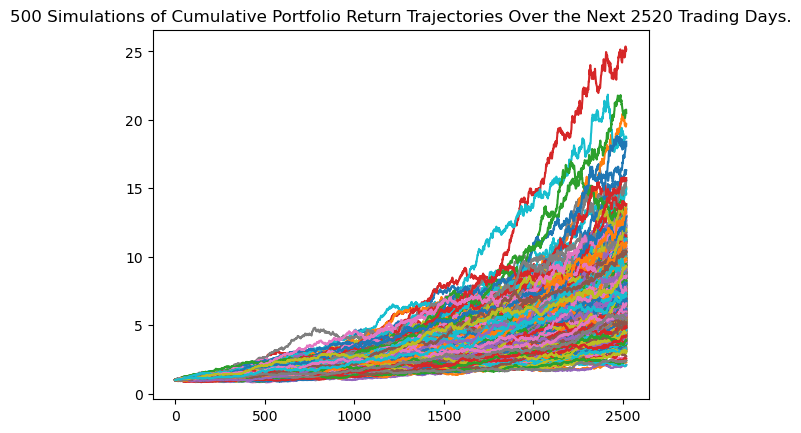

In [10]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_yrs_line_plot = MC_10_yrs.plot_simulation()


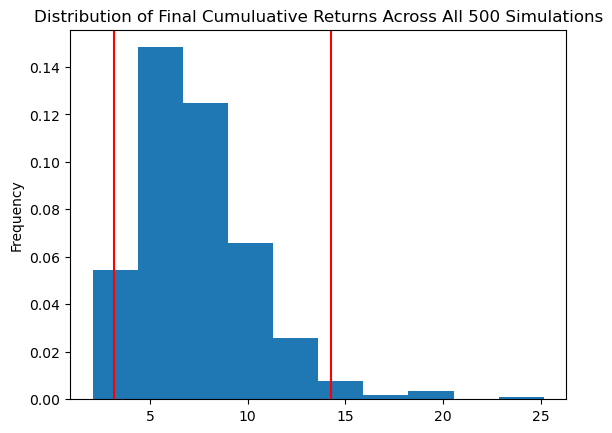

In [11]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_yrs_distribution_plot = MC_10_yrs.plot_distribution()


In [12]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10_yrs_sum_statistics = MC_10_yrs.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(MC_10_yrs_sum_statistics)


count           500.000000
mean              7.398574
std               3.016445
min               2.078126
25%               5.222367
50%               6.938845
75%               8.912976
max              25.146284
95% CI Lower      3.148880
95% CI Upper     14.249048
Name: 2520, dtype: float64

In [14]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_10_yrs_sum_statistics[8]*investment_amount
ci_upper_ten_cumulative_return = MC_10_yrs_sum_statistics[9]*investment_amount

# Print the result of your calculations
print(f"There is a 95% chance that an investment of ${investment_amount} in the GrowWise portfolio over the next 10 years will end within the range of ${ci_lower_ten_cumulative_return:.2f} and ${ci_upper_ten_cumulative_return:.02f}")


There is a 95% chance that an investment of $100000 in the GrowWise portfolio over the next 10 years will end within the range of $314888.03 and $1424904.77
